In [2]:
import pandas as pd

full = pd.read_csv("../../data/poptrag_lyrics_genres_corpus_filtered_english.csv")
full.info()

<class 'pandas.DataFrame'>
RangeIndex: 111938 entries, 0 to 111937
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                111938 non-null  int64  
 1   track.s.id                111938 non-null  str    
 2   track.s.title             111937 non-null  str    
 3   track.s.firstartist.name  111938 non-null  str    
 4   album.s.title             111938 non-null  str    
 5   album.s.releaseyear       111938 non-null  int64  
 6   track.s.popularity        111938 non-null  int64  
 7   track.language            111938 non-null  str    
 8   full_lyrics               111938 non-null  str    
 9   cat5                      111938 non-null  str    
 10  pmax5                     111938 non-null  float64
 11  nmax5                     111938 non-null  float64
 12  cat12                     111938 non-null  str    
 13  pmax12                    111938 non-null  float64
 14 

In [3]:
from helpers.LyricsClassficationExperiment import LyricsClassificationExperiment

cat5_exp = LyricsClassificationExperiment(
    corpus=full, 
    genrecol="cat5",
    lyricscol="full_lyrics", 
    artistcol="track.s.firstartist.name", 
    output_dir="cat5_mock_experiment",
    test_size=0.2,
    random_state=42, 
    subsample_debug=0.005,
)
print(cat5_exp)

LyricsClassificationExperiment with 5 genres
Train size: 448 samples
Test size: 111 samples
Features not yet computed.
Model not yet trained.
Output directory: cat5_mock_experiment



In [4]:
cat5_exp.compute_fs_ngram_features(min_artists=50, top_n = 100)

✓ Extracted unigrams:
  - Unique: 5,785
  - Shape: (448, 5785)
  - Examples: ['trembling', 'climb', 'apart', 'harborview', 'fuel']
✓ Extracted bigrams:
  - Unique: 31,113
  - Shape: (448, 31113)
  - Examples: ['sailed at', 'blow no', 'after the', 'the barracks', 'from these']
✓ Extracted trigrams:
  - Unique: 48,768
  - Shape: (448, 48768)
  - Examples: ['turn older did', 'cashy rings like', 'all i wish', 'your problem is', "i'll fall or"]
Calculating genre-level TF-IDF for unigrams with genre ...
✓ Calculated TF-IDF for 9,594 genre-ngram pairs
Calculating genre-level TF-IDF for bigrams with genre ...
✓ Calculated TF-IDF for 37,148 genre-ngram pairs
Calculating genre-level TF-IDF for trigrams with genre ...
✓ Calculated TF-IDF for 50,546 genre-ngram pairs
Counting artists per n-gram...


100%|██████████| 5785/5785 [00:00<00:00, 8917.70it/s]


✓ Calculated artist diversity for 5,785 n-grams
Counting artists per n-gram...


100%|██████████| 31113/31113 [00:03<00:00, 9106.05it/s]


✓ Calculated artist diversity for 31,113 n-grams
Counting artists per n-gram...


100%|██████████| 48768/48768 [00:05<00:00, 9115.80it/s]


✓ Calculated artist diversity for 48,768 n-grams
Total unique n-grams: 135


In [5]:
print(cat5_exp)
# cat5_exp.show_train_test_genrefreq_comparison()
cat5_exp.X_train.shape[1] == cat5_exp.X_test.shape[1]
# cat5_exp.X_test

cat5_exp.y_train

LyricsClassificationExperiment with 5 genres
Train size: 448 samples
Test size: 111 samples
# of features: 135
Feature type: Fell-Spohrleder (2014) N-grams (top 100, min. 50 artists)
Model not yet trained.
Output directory: cat5_mock_experiment



0      hip hop
1          pop
2         rock
3         rock
4      hip hop
        ...   
443       rock
444        pop
445        pop
446        pop
447       rock
Name: genre, Length: 448, dtype: str

In [14]:
import numpy as np

param_space = {
    "C": [-3, 2],
    "l1_ratio": [0, 1],
    "target_ratio": [np.log10(1), np.log10(5)],
}  # C and target_ratio in log scale 
cat5_exp.tune_and_train_logistic_regression(
    param_space, cv=2, n_initial=3, n_iterations=2, n_jobs=6
)

Starting Initial Phase:
Using 6 parallel jobs
Initial evaluation 1/3
Score: 0.1063 ± 0.0309
------------------------------------------------------------
Initial evaluation 2/3
Score: 0.2301 ± 0.0218
------------------------------------------------------------
Initial evaluation 3/3
Score: 0.2827 ± 0.0390
------------------------------------------------------------
Starting Bayesian Phase:
Bayesian iteration 1/2
Score: 0.2898 ± 0.0119
------------------------------------------------------------
Bayesian iteration 2/2
Score: 0.2873 ± 0.0159
------------------------------------------------------------
Selecting best parameters according to 1-SE rule...
Retraining best pipeline on full training data...


N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
N:\Materialien\Promotion\LyricsGenreRecognition\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
cat5_exp.model_coefficients

,electronic,hip hop,metal,pop,rock
day,0.698727,-0.496876,-0.469416,0.100408,0.075919
need,0.969406,-0.167903,-1.637943,0.224277,0.497463
up,-0.042648,0.905786,-1.385453,-0.020484,0.662917
cause,0.917776,-0.033410,-0.908249,-0.106067,0.232719
if,0.051179,0.000000,0.263133,-0.135586,-0.129529
...,...,...,...,...,...
that,-0.166319,0.622572,-0.556731,0.073203,0.000000
of,-0.576325,0.000000,0.602352,0.071548,-0.099013
tell,0.788154,-0.089611,-0.654457,0.229673,-0.153707
are,-0.207279,0.392682,0.093918,0.007773,-0.396108


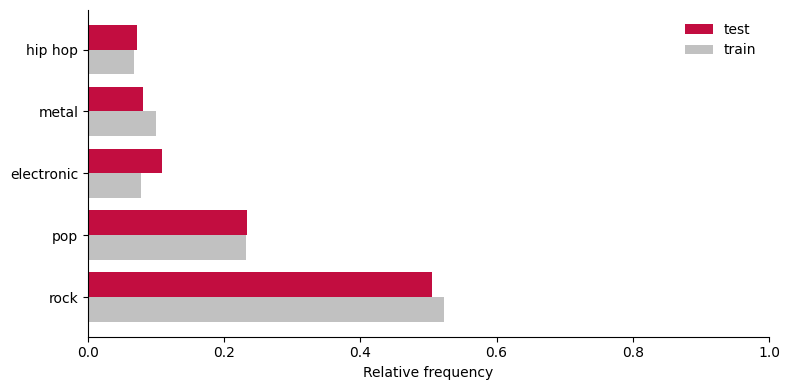

In [8]:
cat5_exp.show_train_test_genrefreq_comparison()

In [9]:
cat5_exp.show_random_baseline_evaluation()

F1 macro: 0.148
Precision macro: 0.142
Recall macro: 0.142
Cohen's kappa: -0.053


In [10]:
cat5_exp.show_tuning_history()

Selected model parameters:
  C: 5.388
  l1_ratio: 0.405
  target_ratio: 4.668
   iteration  score_mean  score_se          C  l1_ratio  target_ratio
0          0    0.106303  0.030941   0.002381  0.187041      1.844740
1          0    0.230072  0.021815   0.148270  0.968608      1.013164
2          0    0.282654  0.038955   5.388077  0.404645      4.667892
3          1    0.289826  0.011922  29.780531  0.885164      3.517181
4          2    0.287305  0.015871  65.778706  0.495212      4.650594


In [11]:
cat5_exp.show_model_evaluation()
type(cat5_exp.model)

Selected model parameters:
  C: 5.388
  l1_ratio: 0.405
  target_ratio: 4.668
F1 macro: 0.277
Precision macro: 0.278
Recall macro: 0.278
Cohen's kappa: 0.068
              precision    recall  f1-score   support

  electronic       0.07      0.08      0.07        12
     hip hop       0.29      0.25      0.27         8
       metal       0.27      0.33      0.30         9
         pop       0.21      0.19      0.20        26
        rock       0.56      0.54      0.55        56

    accuracy                           0.37       111
   macro avg       0.28      0.28      0.28       111
weighted avg       0.38      0.37      0.37       111



imblearn.pipeline.Pipeline

In [12]:
import pickle
cat5_exp.save_experiment()
test = pickle.load(open("cat5_mock_experiment/complete_experiment.pkl", "rb"))

In [13]:
test.show_random_baseline_evaluation()
test.show_model_evaluation()
test.X_train.shape

F1 macro: 0.148
Precision macro: 0.142
Recall macro: 0.142
Cohen's kappa: -0.053
Selected model parameters:
  C: 5.388
  l1_ratio: 0.405
  target_ratio: 4.668
F1 macro: 0.277
Precision macro: 0.278
Recall macro: 0.278
Cohen's kappa: 0.068
              precision    recall  f1-score   support

  electronic       0.07      0.08      0.07        12
     hip hop       0.29      0.25      0.27         8
       metal       0.27      0.33      0.30         9
         pop       0.21      0.19      0.20        26
        rock       0.56      0.54      0.55        56

    accuracy                           0.37       111
   macro avg       0.28      0.28      0.28       111
weighted avg       0.38      0.37      0.37       111



(448, 135)